In [147]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), "code"))
from IPython.display import HTML, display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import precision_score

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

# Describe the Dataset
Write ~3 paragraphs about the dataset.

First paragraph establish interest and phenomenon of bank account fraud by drawing upon:
- prevalence of identity fraud in canada
- case study of a criminology prof having multiple open bank accounts in US after identity was leaked

Second paragraph describe bank account fraud dataset. Include:
- Overall where the data comes from, who funded and created the dataset
- Overall purpose of a ML fraud detection dataset (eg. has class imbalance, specific features)
- Purpose for fair ML (no discriminating and denying bank acounts to a certain populaion

Third paragraph describe the data:
- Identify what the target and features are
- Datasheet that desribes the data https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf 

In [58]:
# Load the dataset
fraud_df = pd.read_csv("Base.csv")
fraud_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [3]:
# Describe the dataset (numeric predictors)
fraud_df.describe(include=['number'])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [4]:
# describe the dataset (categorical predictors)
# 1. Select columns with 'object' or 'category' dtype
categorical_features = [
    "payment_type",
    "employment_status",
    "housing_status",
    "source",
    "device_os",
]

for col in categorical_features:
    # Get the total number of non-missing values for the denominator
    total_non_missing = fraud_df[col].count()

     # 2. Calculate value counts
    counts = fraud_df[col].value_counts()

    # 3. Calculate percentages: (count / total non-missing) * 100
    percentages = (counts / total_non_missing) * 100
        
    # 4. Create a summary table for display
    show_categorical_percentages = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})

    print(f"\nFeature: '{col}' (Total Non-Missing: {total_non_missing})")
    print("-" * (len(col) + 20))
    display(show_categorical_percentages)


Feature: 'payment_type' (Total Non-Missing: 1000000)
--------------------------------


,Count,Percentage (%)
payment_type,,
AB,370554,37.06
AA,258249,25.82
AC,252071,25.21
AD,118837,11.88
AE,289,0.03



Feature: 'employment_status' (Total Non-Missing: 1000000)
-------------------------------------


,Count,Percentage (%)
employment_status,,
CA,730252,73.03
CB,138288,13.83
CF,44034,4.40
CC,37758,3.78
CD,26522,2.65
CE,22693,2.27
CG,453,0.05



Feature: 'housing_status' (Total Non-Missing: 1000000)
----------------------------------


,Count,Percentage (%)
housing_status,,
BC,372143,37.21
BB,260965,26.10
BA,169675,16.97
BE,169135,16.91
BD,26161,2.62
BF,1669,0.17
BG,252,0.03



Feature: 'source' (Total Non-Missing: 1000000)
--------------------------


,Count,Percentage (%)
source,,
INTERNET,992952,99.3
TELEAPP,7048,0.7



Feature: 'device_os' (Total Non-Missing: 1000000)
-----------------------------


,Count,Percentage (%)
device_os,,
other,342728,34.27
linux,332712,33.27
windows,263506,26.35
macintosh,53826,5.38
x11,7228,0.72


# Missing Values
Checked to see what values are missing to inform decisions about keeping or dropping features from the dataset.

In [5]:
# use is.null to see if any values are labeled as null
print(fraud_df.isnull().any(axis = 0)) 

# Create a loop to count the percentage of values that are missing indicated by -1
for i in range(32):
    print(fraud_df.columns[i] + " " + str(sum(fraud_df[fraud_df.columns[i]] == -1)/len(fraud_df)))

fraud_bool                          False
income                              False
name_email_similarity               False
prev_address_months_count           False
current_address_months_count        False
customer_age                        False
days_since_request                  False
intended_balcon_amount              False
payment_type                        False
zip_count_4w                        False
velocity_6h                         False
velocity_24h                        False
velocity_4w                         False
bank_branch_count_8w                False
date_of_birth_distinct_emails_4w    False
employment_status                   False
credit_risk_score                   False
email_is_free                       False
housing_status                      False
phone_home_valid                    False
phone_mobile_valid                  False
bank_months_count                   False
has_other_cards                     False
proposed_credit_limit             

In [6]:
# for intended_balcon_amount count the missing values indicated y any negative number
negative_count = (fraud_df['intended_balcon_amount'] < 0).sum()
# Get the total number of non-missing rows (length of the DataFrame)
total_count = len(fraud_df)
print('intended_balcon_amount' + " " + str(negative_count/total_count))

intended_balcon_amount 0.742523


# Dropping Variables and Median Imputation
There are 3 variables that have a relatively high proportion of missing values:
* bank_months_count, which is how old the previous account is (if held) in months. Of all observations in the fraud dataset, around 25% are missing.
* prev_address_months_count, which is number of months in previous registered address of the applicant, i.e the applicant's previous residence, if applicable. Over 71% of the values of this variable is missing. 
* intended_balcon_amount, which is the initial transferred amount for application. Over 74% of values are missing.

To deal with missing values, we have a few options. First, we can drop all the observations with a missing value. Given the 3 variables with high proportion of missing values, this option will likely servery reduce the size of our dataset. The second option is to drop the feature tat has a high proportion of missing values. Given that there are a total of 32 features, this option is viable. The high proportion of missing values for the 3 features indicates that it is not an important predictor. For example, it could indicate that there isn't initial transferred amounts in many cases, or that there isn't a previously held account. Therefore for the above 3 variables, we will drop them from our dataset.

A third option is median imputation, where we can replace feature values with the median over all observations. This option may be useful for the featurs where a small proportion of values are missing. These are:
* device_distinct_emails_8w, which is the number of distinct emails in banking website from that used device in the last 8 weeks
* session_length_in_minutes, which is the length of user session in banking website in minutes
* current_address_months_count, which is months in currently registered address of the applicant.

# Categorical Features
Additionally, there are 5 categorical variables that we will have to deal with in this dataset. These are:
* "payment_type", which is credit payment plan type that includes 5 anonymous types.
* "employment_status", which is the employment status of the applicant represented by 7 anonymous values
* "housing_status", which is the current residential status for the applicant represented by 7 anonymous values
* "source", which is the online source of the application represented either by INTERNET or TELEAPP
* "device_os", which is the operative system of the device that made the request. Possible values are: Windows, macOS, Linux, X11, or other.

The first three variables in the list include anonymous values. While these could be useful indicators of fraud, for example indicating the wealth of the individual and type of credit payment plan they use, the anonymous values do not make them useful for our analysis. We could keep them within our dataset, however, we will not be able to say anything useful about the features unless we know more about the categories that the anonymous values represent. Additionally we would need to create additional features for each category, which will add more features and complexity to our model. Therefore we will drop payment_type, employment_status, and housing_status from our dataset.

In [59]:
# Drop columns that we mentioned that we will drop
fraud_df = fraud_df.drop(columns=["prev_address_months_count", "bank_months_count", "intended_balcon_amount", "housing_status", "employment_status",
                         "payment_type"], axis = 1)

# Encode categorical predictor device_os
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_df[['device_os']]).toarray())
encoder_df.columns = ["linux", "macintosh", "other", "windows", "x11"]
fraud_df = fraud_df.join(encoder_df)
fraud_df = fraud_df.drop(columns=['device_os', 'linux'], axis = 1) # drop is_linux feature, use it as the reference category

# Encode categorical predictor source
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(fraud_df[['source']]).toarray())
encoder_df.columns = ["INTERNET", "TELEAPP"]
fraud_df = fraud_df.join(encoder_df)
fraud_df = fraud_df.drop(columns=['source', 'INTERNET'], axis = 1) # drop INTERNET feature, use it as the reference category

# Median imputation for features with few missing values
fraud_df[['current_address_months_count',
          'session_length_in_minutes', 
          'device_distinct_emails_8w']] = fraud_df[['current_address_months_count',
                                                    'session_length_in_minutes', 
                                                    'device_distinct_emails_8w']].replace(-1, fraud_df.median())

# Multicollinearity

We created a correlation matrix as a heatmap to identify which features are similar to one another. The coloured heatmap allows us to easily identify the pairs of features that are highly correlated with one another, which would limit the precision of our estimated coefficients within our model. The following features are highly correlated with one another (identified by the dark colours butting correlation coefficent above 0.75):
* month, velocity_4w
* month, velocity_24h
* velocity_24h, velocity_4w
* proposed_credit_limit, credit_risk_score
* date_of_birth_distinct_emails_4w, customer_age

Therefore, to reduce multicollinearity amongst our features, we will remove the following features:
* velocity_24h and velocity_4w. Explanation: We already have a velocity_6h so we can keep that feature which encompasses a similar definition. Both of these features are also highly correlated with month application was made, which we want to keep becuase it is a different type of measurement
* proposed_credit_limit. Explanation: This is highly correlated with credit_risk_score. Dropping either one is arbitrary so we just chose proposed credit limit because credit risk score is more interpretable.
* date_of_birth_distinct_emails_4w. Explanation: it is highly correlated with customer age, which is more interpretable.

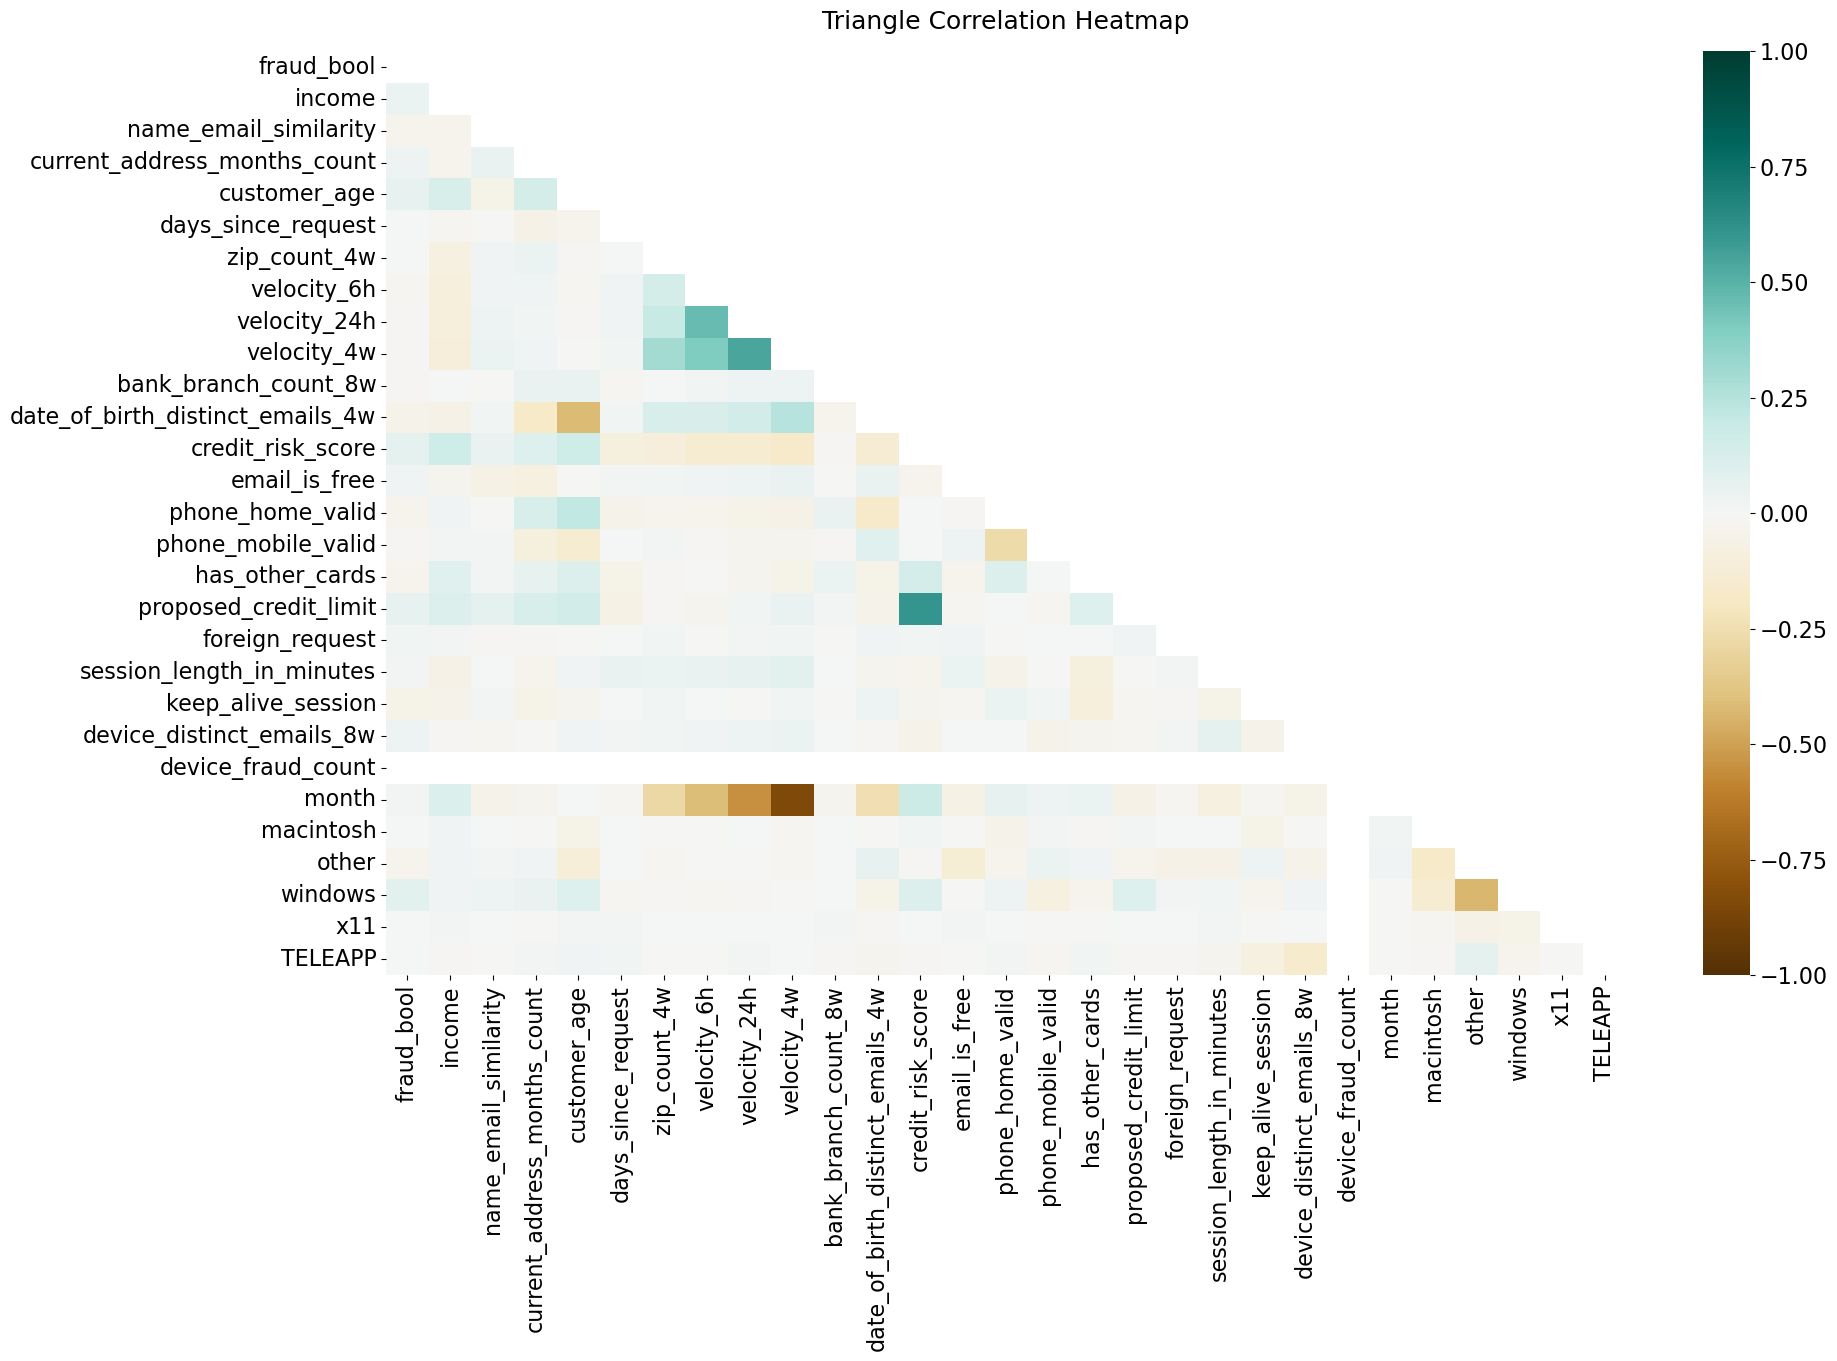

In [46]:
## Triangle Correlation Matrix

plt.figure(figsize=(20, 12))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(fraud_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(fraud_df.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#df.corr()

In [60]:
# Drop columns that we mentioned that we will drop
fraud_df = fraud_df.drop(columns=["velocity_24h", "velocity_4w", "proposed_credit_limit", "date_of_birth_distinct_emails_4w"], axis = 1)

# Features and Labels
What is being measured and how we are measuring it.
* Feature = columns.
* Target = fraud bool, where 0 is a on-fraudlent account and 1 is a fraudulent account

In [52]:
# count the number of fraudulent bank accounts
fraud_df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [53]:
# count the number of observations that occur in months 6 and 7 vs in months 1 to 5
(fraud_df['month'] >= 6).value_counts()

month
False    794989
True     205011
Name: count, dtype: int64

In [54]:
# Defining the label (y)
y = fraud_df['fraud_bool']

# Defining the features
X = fraud_df.drop('fraud_bool', axis=1)

# Split in Training and Test Dataset

We chose to split the dataset based on the temporal information provided by month. Generally for fraud detection, ML models would be trained on older data and tested on the most recent data since it is likely to be most relevant to future data. As suggested in the dataset guidelines, we split our training dataset to focus on the first 5 months and the test dataset to focus on the most recent two months. We also took a 1% sample for the testa nd training dataset to improve computational efficiency.

In [112]:
# Create the train and test sets. Shuffle data with `sample` method.
# The split was done by month. The first 6 months as the train, the last 2 months as test.
# We only used 1% of the dataset for more efficient computations
train_df = fraud_df[fraud_df["month"] < 6].sample(frac=0.01, replace=False)
test_df = fraud_df[fraud_df["month"] >= 6].sample(frac=0.01, replace=False)

In [113]:
#view training dataset
HTML(train_df.head().to_html(index=False))

fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,bank_branch_count_8w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,macintosh,other,windows,x11,TELEAPP
0,0.1,0.381134,55,20,26.239330,1142,7818.577675,15,14,0,0,1,0,0,9.030376,1,1,0,0,0.0,0.0,0.0,0.0,0.0
0,0.3,0.439296,122,20,0.013982,2513,4939.729938,9,155,0,0,0,0,0,3.214777,1,1,0,4,0.0,1.0,0.0,0.0,0.0
0,0.1,0.910218,65,40,0.018369,790,5485.779133,1,302,0,1,1,0,0,5.853715,0,1,0,2,0.0,0.0,0.0,0.0,0.0
0,0.4,0.772251,81,40,0.022818,3174,2454.429095,11,-52,0,0,1,0,0,6.319599,1,1,0,0,0.0,0.0,0.0,0.0,0.0
0,0.8,0.099409,87,30,0.011133,1062,5538.168889,5,84,0,0,1,0,0,4.723190,1,1,0,4,0.0,1.0,0.0,0.0,0.0


In [114]:
train_df.shape

(7950, 25)

In [122]:
test_df.shape

(2050, 25)

# Baseline dummy classifier

In [123]:
# create a classifier object
from sklearn.dummy import DummyClassifier # import the classifier

dummy_clf = DummyClassifier(strategy="most_frequent") # Create a classifier object

# fit the classifier
dummy_clf.fit(X, y); # fit the classifier

# predict using the trained classifier
dummy_clf.predict(X) # predict using the trained classifier

# score of model that is trained on baseline of predicting only ham
print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X, y)))

The accuracy of the model on the training data: 0.989


In [124]:
# report the error of the classifier
print(
    "The error of the model on the training data: %0.3f" % (1 - dummy_clf.score(X, y))
)

The error of the model on the training data: 0.011


# Logistic Regression

In [136]:
# Training dataset
# Define x_train as the sms (what is being used to make prediction)
# define Y_train as target (what is being predicted - spam or ham)
X_train, y_train = train_df.drop('fraud_bool', axis=1), train_df["fraud_bool"]

# Test dataset
# Define x_test as the sms (what is being used to make prediction)
# define Y_test as target (what is being predicted - spam or ham)
X_test, y_test = test_df.drop('fraud_bool', axis=1), test_df["fraud_bool"]

In [137]:
train_df["fraud_bool"].value_counts(normalize=True)

fraud_bool
0    0.991195
1    0.008805
Name: proportion, dtype: float64

In [138]:
# Create the classifier.
# construct a pipeline that includes  2 steps
#the first step includes a feature extraction tool for text data.
#the second step includes a linear biary classification model
clf = make_pipeline(StandardScaler(), LogisticRegression())

# fit the classifier
clf.fit(X_train, y_train);

# predict on the test data
clf.predict(X_test)

# score the model
print("The accuracy of the model on the test data: %0.3f" % (clf.score(X_test, y_test)))

The accuracy of the model on the test data: 0.983


In [139]:
# report the error of the classifier
print(
    "The error of the model on the training data: %0.3f" % (1 - clf.score(X_test, y_test))
)

The error of the model on the training data: 0.017


In [148]:
#create the confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2016    0]
 [  34    0]]


The accuracy of the model on the test data: 0.983


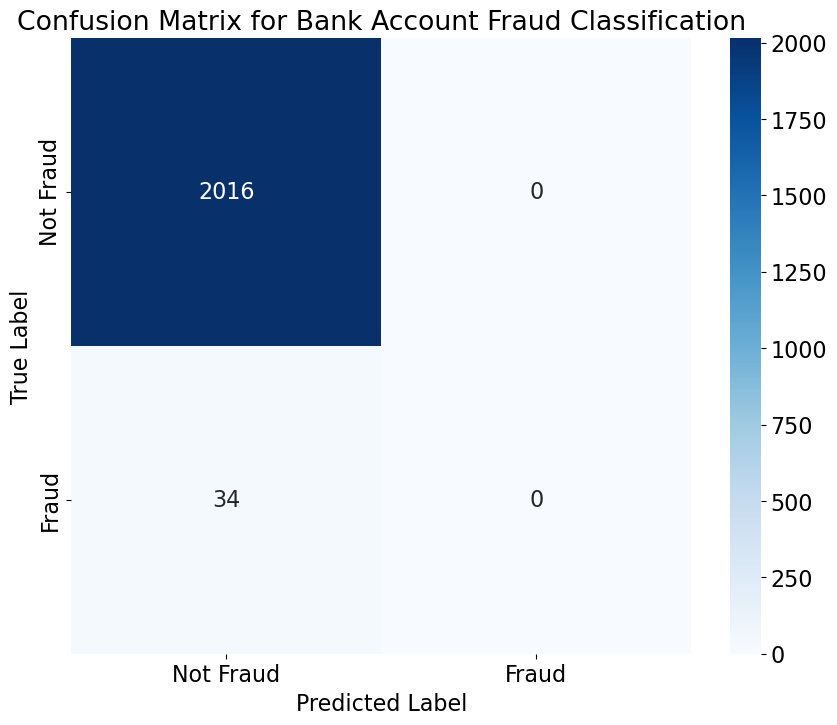

In [152]:
# visualize the confusion matrix
# I had gemini AI help with writing the code for the confusion matrix figure and outlining the interpretation
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Bank Account Fraud Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the plot
plt.savefig('confusion_matrix.png')

# Print classification accuracy for context
accuracy = clf.score(X_test, y_test)
print(f"The accuracy of the model on the test data: {accuracy:0.3f}")

In [150]:
# Calculate precision score from confusion matrix
print("TP = %0.4f, FP = %0.4f" % (TP, FP))
precision = TP / (TP + FP)
print("Precision: %0.4f" % (precision))

NameError: name 'TP' is not defined

In [151]:
# Calculate recall score from confusion matrix
print("TP = %0.4f, FN = %0.4f" % (TP, FN))
recall = TP / (TP + FN)
print("Recall: %0.4f" % (recall))

NameError: name 'TP' is not defined

In [141]:
import time
t1 = time.time()
clf.fit(X_train, y_train)
t2 = time.time()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
df.describe()